# Distribution of $\mathbf{\Delta R}$ 2j1p for Signal and Background

In [8]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn
import json
from tqdm import tqdm

In [3]:
with open('./13j3p/json_data/signal_btag_label.json', 'r') as file:
    signal = json.load(file)

with open('./13j3p/json_data/background_btag_label.json', 'r') as file:
    background = json.load(file)

In [4]:
signal[0]

{'eventno': 2,
 'nodes': [[-2.22728, 0.220275, 22.3859, 105.017],
  [-1.74376, -1.4023, 22.4845, 66.2581]],
 'edges': [1.6930863005248729],
 'edge_index': [[0], [1]],
 'node_labels': [0, 1],
 'jet_btag_label': [0.0, 0.0],
 'jetmultiplicity': 2,
 'inv_mass': 34.334697499497636,
 'event_label': 1}

## Filtering the dataset to take events with only 2 B-tagged Jets and 1 Isolated Photon

In [10]:
signal_2j1p = []
background_2j1p = []
with tqdm(total = len(signal)) as pbar:
    print('--->Initializing the loop...')
    for event in signal:
        num_nodes = len(event['nodes'])
        num_isophoton = event['node_labels'].count(0.0)
        num_btagjets = event['jet_btag_label'].count(1.0)
        if (num_nodes == 3) & (num_isophoton == 1) & (num_btagjets == 2):
            signal_2j1p.append(event['edges'])
            pbar.update(1)
        else:
            pbar.update(1)
    print('--->Loop completed succesfully :)')
    print(f"Signal events satisfying the criteria: {len(signal_2j1p)}")
    print()

with tqdm(total = len(background)) as pbar:
    print('--->Initializing the loop...')
    for event in background:
        num_nodes = len(event['nodes'])
        num_isophoton = event['node_labels'].count(0.0)
        num_btagjets = event['jet_btag_label'].count(1.0)
        if (num_nodes == 3) & (num_isophoton == 1) & (num_btagjets == 2):
            background_2j1p.append(event['edges'])
            pbar.update(1)
        else:
            pbar.update(1)
    print('--->Loop completed succesfully :)')
    print(f"Background events satisfying the criteria: {len(background_2j1p)}")

100%|██████████| 119966/119966 [00:00<00:00, 1223895.10it/s]


--->Initializing the loop...
--->Loop completed succesfully :)
Signal events satisfying the criteria: 804



100%|██████████| 126444/126444 [00:00<00:00, 1232032.89it/s]

--->Initializing the loop...
--->Loop completed succesfully :)
Background events satisfying the criteria: 1271


In [12]:
signal_deltaR = np.array(signal_2j1p).reshape((-1,3))
background_deltaR = np.array(background_2j1p).reshape((-1,3))

[[2.71304399 2.08101096 1.5282685 ]
 [2.33399847 2.23253419 1.86427456]
 [2.0976263  2.38229308 1.90260746]
 [2.79637654 1.78742985 2.97964854]
 [2.22072783 3.70415451 1.90379881]]


**Array Column Structure: (detlaR_isophoton_jet1, detlaR_isophoton_jet2, detlaR_jet1_jet2)**

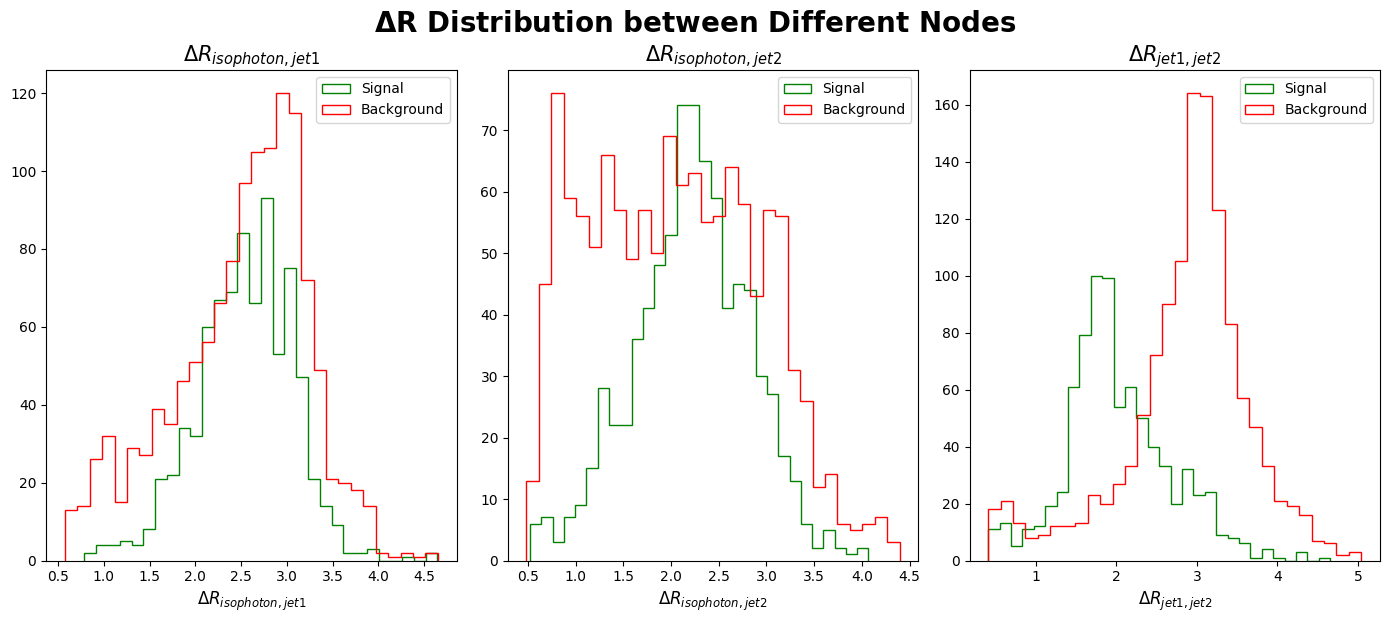

In [25]:
fig, axs = plt.subplots(1, 3, figsize = (14,6))

# Distributio of detlaR_isophoton_jet1
axs[0].hist(signal_deltaR[:,0], label = 'Signal', histtype = 'step', color = 'green', bins = 30)
axs[0].hist(background_deltaR[:,0], label = 'Background', histtype = 'step', color = 'red', bins = 30)
axs[0].set_xlabel('$\Delta R_{isophoton,jet1}$', fontsize = 12)
axs[0].legend()
axs[0].set_title('$\Delta R_{isophoton,jet1}$', fontsize = 15)

# Distributio of detlaR_isophoton_jet2
axs[1].hist(signal_deltaR[:,1], label = 'Signal', histtype = 'step', color = 'green', bins = 30)
axs[1].hist(background_deltaR[:,1], label = 'Background', histtype = 'step', color = 'red', bins = 30)
axs[1].set_xlabel('$\Delta R_{isophoton,jet2}$', fontsize = 12)
axs[1].legend()
axs[1].set_title('$\Delta R_{isophoton,jet2}$', fontsize = 15)

# Distributio of detlaR_jet1_jet2
axs[2].hist(signal_deltaR[:,2], label = 'Signal', histtype = 'step', color = 'green', bins = 30)
axs[2].hist(background_deltaR[:,2], label = 'Background', histtype = 'step', color = 'red', bins = 30)
axs[2].set_xlabel('$\Delta R_{jet1,jet2}$', fontsize = 12)
axs[2].legend()
axs[2].set_title('$\Delta R_{jet1,jet2}$', fontsize = 15)

plt.tight_layout()
plt.suptitle('$\mathbf{\Delta R}$ Distribution between Different Nodes', fontsize = 20, fontweight = 'bold', y=1.04)
plt.show()

# As the three nodes form a Triangle, lets analyze the area of that triangle using Heron's Formula

In [36]:
def herons_area(sides_arr:np.array):
    """sides_arr = np.array([a,b,c]), where a, b, and c are sides of the triangle"""
    a,b,c = sides_arr[0], sides_arr[1], sides_arr[2]
    s = np.sum(sides_arr)/2 # Semiperimeter
    area = np.sqrt(s * (s - a) * (s - b) * (s - c))
    return area

In [40]:
signal_area = []
background_area = []
for event in signal_deltaR:
    area = herons_area(event)
    signal_area.append(area)

for event in background_deltaR:
    area = herons_area(event)
    background_area.append(area)

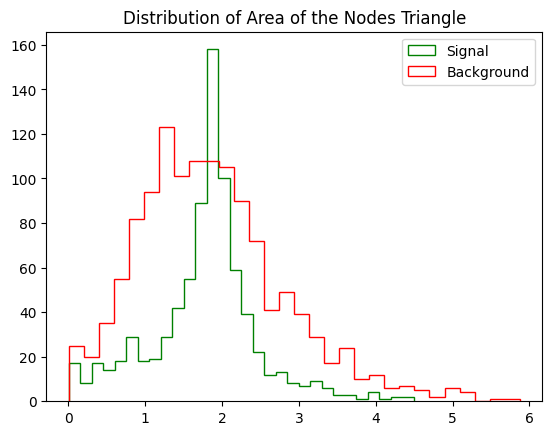

In [45]:
plt.hist(signal_area, bins = 30, histtype = 'step', color = 'green', label = 'Signal')
plt.hist(background_area, bins = 30, histtype = 'step', color = 'red', label = 'Background')
plt.legend()
plt.title('Distribution of Area of the Nodes Triangle')
plt.show()

# Standard Deviation of $\mathbf{\Delta R}s$

In [43]:
signal_std = []
background_std = []

for event in signal_deltaR:
    signal_std.append(event.std())

for event in background_deltaR:
    background_std.append(event.std())

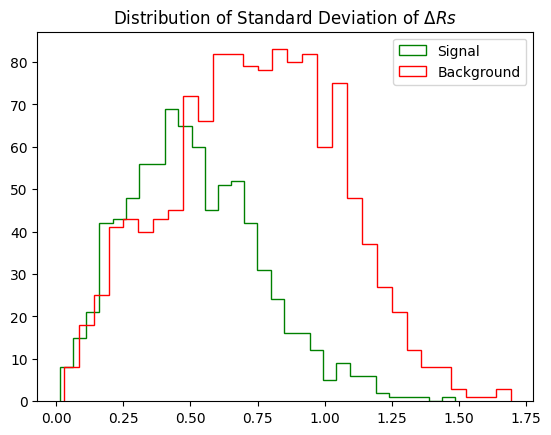

In [47]:
plt.hist(signal_std, bins = 30, histtype = 'step', color = 'green', label = 'Signal')
plt.hist(background_std, bins = 30, histtype = 'step', color = 'red', label = 'Background')
plt.legend()
plt.title('Distribution of Standard Deviation of $\Delta Rs$')
plt.show()